In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml

from models.point import Point
from models.map import Map
from models.pose import Pose
import math

from path_find_algorithms.A_star.A_star import AStar

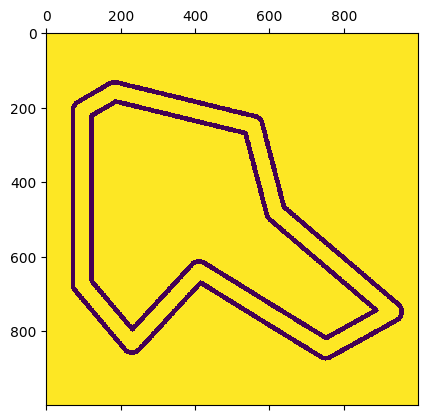

In [2]:
with open('../../../to_be_saved/occupancy_grid.npy', 'rb') as f:
    occupancy_grid = np.load(f)

with (open('../../../to_be_saved/occupancy_grid_info.yaml', 'rb')) as f:
    occupancy_grid_config = yaml.safe_load(f)

occupancy_grid_filtered = (occupancy_grid <30)*1
plt.matshow(occupancy_grid_filtered)

# For some reason the maps come with an resolution offset
resolution = occupancy_grid_config["resolution"]
occupancy_map = Map(occupancy_grid_filtered, resolution, Point(occupancy_grid_config["origin_x"] - resolution, occupancy_grid_config["origin_y"] -resolution))

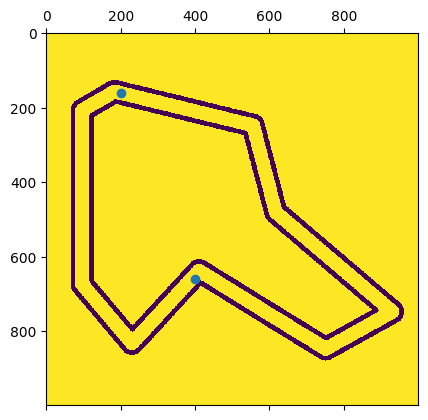

In [3]:
start = Point(200, 160)
goal = Point(400, 660)
plt.matshow(occupancy_grid_filtered)
plt.scatter([start.x, goal.x ], [start.y, goal.y])


backsolve


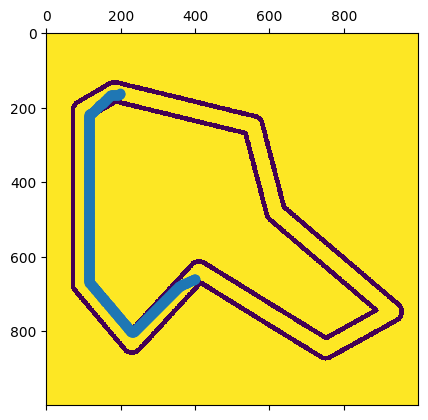

In [4]:

path = AStar.find_path(start, goal, occupancy_map.grid)

plt.matshow(occupancy_grid_filtered)
plt.scatter([point.x for point in path], [point.y for point in path])

In [6]:
# Create Trajectory from Path
path_world_coordinates = list(map(lambda point: occupancy_map.grid_point_to_world_point(
point), path))

trajectory = [Pose(path_world_coordinates[0], 0)]
for (prev, curr) in zip(path_world_coordinates[:-1], path_world_coordinates[1:]):
    vec_to_target = (curr.x-prev.x, curr.y-prev.y)
    angle = math.atan2(vec_to_target[1],  vec_to_target[0])

    trajectory.append(Pose(curr, angle))

trajectory.append(Pose(path_world_coordinates[-1], 0))

In [9]:
# Write into file
with open('../../../to_be_saved/trajectory.txt', 'r+') as f:
    for pose in trajectory:
        f.write(f"{pose.coordinate.x},{pose.coordinate.y},{pose.angle}\n")

In [ ]:
gazebo_msgs.srv.GetEntityState_Response(
    header=std_msgs.msg.Header(
        stamp=builtin_interfaces.msg.Time(sec=0, nanosec=0), frame_id=''), state=
gazebo_msgs.msg.EntityState(name='tas-car', 
pose=geometry_msgs.msg.Pose(
    position=geometry_msgs.msg.Point(x=0.0, y=0.0, z=0.0), 
    orientation=geometry_msgs.msg.Quaternion(x=0.0, y=0.0, z=0.0, w=1.0)), 
    twist=geometry_msgs.msg.Twist(
        linear=geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0), 
        angular=geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)), 
    reference_frame=''), success=False)

In [ ]:
{
    name='tas-car', 
    pose=geometry_msgs.msg.Pose(
    position=geometry_msgs.msg.Point(x=0.0, y=0.0, z=0.0), 
    orientation=geometry_msgs.msg.Quaternion(x=0.0, y=0.0, z=0.0, w=1.0),
    ), 
    twist=geometry_msgs.msg.Twist(
        linear=geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0), 
        angular=geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)
    ),
    reference_frame=''
}

In [2]:
from gazebo_msgs.msg import ModelState, EntityState
from gazebo_msgs.srv import SetEntityState, GetEntityState
import rclpy
from rclpy.node import Node

rclpy.init()

node = Node("service")

get_entity_state = node.create_client(GetEntityState, "/gazebo/get_entity_state")
while get_entity_state.wait_for_service(timeout_sec=10.0):
    print("service not available")
request = GetEntityState.Request()
request.name = "tas-car"
result = get_entity_state.call(request)
print(result)




NotInitializedException: ('rclpy.init() has not been called', 'cannot create node')